**Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

**Load Dataset (MNIST)**

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Build Deep Learning Model**

In [ ]:
def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

**Train Model with Fixed Learning Rate**

In [ ]:
model_fixed = create_model()

model_fixed.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_fixed = model_fixed.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8612 - loss: 0.4732 - val_accuracy: 0.9607 - val_loss: 0.1303
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9647 - loss: 0.1186 - val_accuracy: 0.9663 - val_loss: 0.1103
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9773 - loss: 0.0753 - val_accuracy: 0.9726 - val_loss: 0.0945
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9827 - loss: 0.0569 - val_accuracy: 0.9682 - val_loss: 0.1090
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9684 - val_loss: 0.1167
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.9749 - val_loss: 0.0937
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0281 - val_accuracy: 0.9700 - val_loss: 0.1157
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9918 - loss: 0.0253 - 

**Apply Learning Rate Scheduling**

In [ ]:
def lr_schedule(epoch, lr):
    return lr * 0.9

lr_callback = LearningRateScheduler(lr_schedule)

model_lr = create_model()

model_lr.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_lr = model_lr.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[lr_callback]
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8628 - loss: 0.4799 - val_accuracy: 0.9530 - val_loss: 0.1533 - learning_rate: 9.0000e-04
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9670 - loss: 0.1149 - val_accuracy: 0.9701 - val_loss: 0.1067 - learning_rate: 8.1000e-04
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9788 - loss: 0.0695 - val_accuracy: 0.9669 - val_loss: 0.1048 - learning_rate: 7.2900e-04
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9847 - loss: 0.0507 - val_accuracy: 0.9737 - val_loss: 0.0858 - learning_rate: 6.5610e-04
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9753 - val_loss: 0.0847 - learning_rate: 5.9049e-04
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9923 - loss: 0.0254 - val_accuracy: 0.9766 - val_loss: 0.0827 - learning_rate: 5.3144e-04
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/ste

**Enable Early Stopping**

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_es = create_model()

model_es.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_es = model_es.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8664 - loss: 0.4663 - val_accuracy: 0.9566 - val_loss: 0.1433
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9637 - loss: 0.1221 - val_accuracy: 0.9644 - val_loss: 0.1167
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9759 - loss: 0.0790 - val_accuracy: 0.9663 - val_loss: 0.1086
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9829 - loss: 0.0556 - val_accuracy: 0.9683 - val_loss: 0.1065
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0434 - val_accuracy: 0.9728 - val_loss: 0.0961
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9888 - loss: 0.0332 - val_accuracy: 0.9707 - val_loss: 0.1069
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0284 - val_accuracy: 0.9717 - val_loss: 0.1034
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0218 - 

**Compare Convergence (Graphs)**

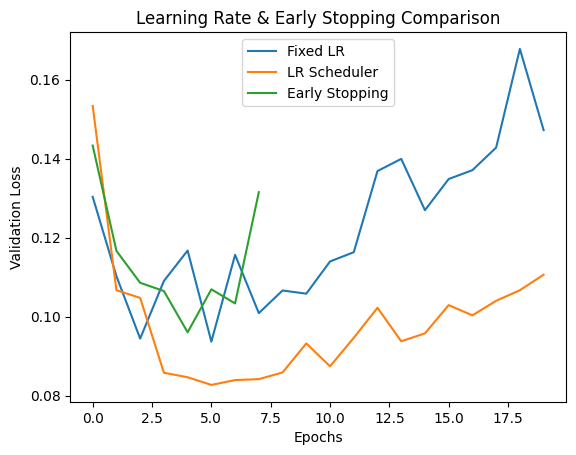

In [ ]:
plt.plot(history_fixed.history['val_loss'], label='Fixed LR')
plt.plot(history_lr.history['val_loss'], label='LR Scheduler')
plt.plot(history_es.history['val_loss'], label='Early Stopping')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Learning Rate & Early Stopping Comparison')
plt.show()

**Epoch Comparison**

In [ ]:
print("Fixed LR epochs:", len(history_fixed.history['loss']))
print("LR Scheduler epochs:", len(history_lr.history['loss']))
print("Early Stopping epochs:", len(history_es.history['loss']))


Fixed LR epochs: 20
LR Scheduler epochs: 20
Early Stopping epochs: 8
